# COVID Deaths Analysis By State 

The goal of this notebook is to process the deaths data by age for each state, then perform principal component analysis to look for trends and any clustering. 

In [1]:
# data handling
import pandas as pd
import numpy as np

# seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
death_data = pd.read_csv('../data/death_data_by_age.csv')

In [3]:
death_data

,Year,Month,State,Age Group,COVID-19 Deaths,Total COVID Deaths,Death Proportion
0,2020,1,Alabama,0-17 years,0.0,0.0,0.0
1,2020,1,Alabama,18-29 years,0.0,0.0,0.0
2,2020,1,Alabama,30-39 years,0.0,0.0,0.0
3,2020,1,Alabama,40-49 years,0.0,0.0,0.0
4,2020,1,Alabama,50-64 years,0.0,0.0,0.0
...,...,...,...,...,...,...,...
5875,2021,3,Wyoming,40-49 years,0.0,0.0,0.0
5876,2021,3,Wyoming,50-64 years,0.0,0.0,0.0
5877,2021,3,Wyoming,65-74 years,0.0,0.0,0.0
5878,2021,3,Wyoming,75-84 years,0.0,0.0,0.0


In [9]:
#create larger age bins 
death_data_by_age = (death_data[['State','Year','Month','Age Group','Death Proportion']]
                          .pivot(index= ['Year','Month','State'],
                                 columns='Age Group',
                                 values='Death Proportion'))
death_data_by_age['0-29']  = death_data_by_age['0-17 years'] + death_data_by_age['18-29 years'] 
death_data_by_age['30-64'] = death_data_by_age['30-39 years'] + death_data_by_age['40-49 years'] + death_data_by_age['50-64 years'] 
death_data_by_age['65+']   = death_data_by_age['65-74 years'] + death_data_by_age['75-84 years'] + death_data_by_age['85 years and over'] 
death_data_by_age[['0-29','30-64','65+']]

Age Group                 0-29     30-64       65+
Year Month State                                  
2020 1     Alabama         0.0  0.000000  0.000000
           Arizona         0.0  0.000000  0.000000
           Arkansas        0.0  0.000000  0.000000
           California      0.0  0.000000  0.000000
           Colorado        0.0  0.000000  0.000000
...                        ...       ...       ...
2021 3     Virginia        0.0  0.199313  0.800687
           Washington      0.0  0.185567  0.814433
           West Virginia   0.0  0.000000  1.000000
           Wisconsin       0.0  0.000000  1.000000
           Wyoming         0.0  0.000000  0.000000

[735 rows x 3 columns]

In [22]:
non_zero_deaths = death_data_by_age[death_data_by_age.any(axis=1)]

In [144]:
deaths_by_state = non_zero_deaths.reset_index().pivot(index='State', columns=['Year','Month'], values=['0-29','30-64','65+']).fillna(0)
deaths_by_state.head()

0-29                                                              \
Year       2020                                                               
Month        3    4    5         6         7         8         9         10   
State                                                                         
Alabama     0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
Arizona     0.0  0.0  0.0  0.012263  0.010496  0.000000  0.000000  0.000000   
Arkansas    0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
California  0.0  0.0  0.0  0.006329  0.010592  0.006961  0.008721  0.006901   
Colorado    0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                                ...       65+                                \
Year                            ...      2020                                 
Month             11        12  ...        6         7         8         9    
State                           ...                                           
Alabama     0.000000  0.000000  ...  0.729798  0.771889  0.765199  0.816697   
Arizona     0.000000  0.000000  ...  0.691193  0.707538  0.698073  0.704981   
Arkansas    0.000000  0.000000  ...  0.704403  0.747212  0.793532  0.845783   
California  0.005108  0.004413  ...  0.723466  0.698786  0.720482  0.714632   
Colorado    0.000000  0.005970  ...  0.780899  0.899281  0.846154  0.857143   

                                                                        
Year                                          2021                      
Month             10        11        12        1         2         3   
State                                                                   
Alabama     0.795956  0.804552  0.805701  0.788999  0.776418  0.832335  
Arizona     0.773438  0.768868  0.796247  0.763934  0.761392  0.778788  
Arkansas    0.850482  0.882002  0.842011  0.826353  0.812217  0.796748  
California  0.728088  0.752063  0.756213  0.738697  0.710968  0.697502  
Colorado    0.826446  0.855848  0.863881  0.840108  0.845426  0.816092  

[5 rows x 39 columns]

In [42]:
deaths_by_state.columns.to_flat_index()

Index([  ('0-29', 2020, 3),   ('0-29', 2020, 4),   ('0-29', 2020, 5),
         ('0-29', 2020, 6),   ('0-29', 2020, 7),   ('0-29', 2020, 8),
         ('0-29', 2020, 9),  ('0-29', 2020, 10),  ('0-29', 2020, 11),
        ('0-29', 2020, 12),   ('0-29', 2021, 1),   ('0-29', 2021, 2),
         ('0-29', 2021, 3),  ('30-64', 2020, 3),  ('30-64', 2020, 4),
        ('30-64', 2020, 5),  ('30-64', 2020, 6),  ('30-64', 2020, 7),
        ('30-64', 2020, 8),  ('30-64', 2020, 9), ('30-64', 2020, 10),
       ('30-64', 2020, 11), ('30-64', 2020, 12),  ('30-64', 2021, 1),
        ('30-64', 2021, 2),  ('30-64', 2021, 3),    ('65+', 2020, 3),
          ('65+', 2020, 4),    ('65+', 2020, 5),    ('65+', 2020, 6),
          ('65+', 2020, 7),    ('65+', 2020, 8),    ('65+', 2020, 9),
         ('65+', 2020, 10),   ('65+', 2020, 11),   ('65+', 2020, 12),
          ('65+', 2021, 1),    ('65+', 2021, 2),    ('65+', 2021, 3)],
      dtype='object')

In [226]:
deaths_by_state.columns = [str(col) for col in deaths_by_state.columns.values]

In [227]:
deaths_by_state.head()

,"('0-29', 2020, 3)","('0-29', 2020, 4)","('0-29', 2020, 5)","('0-29', 2020, 6)","('0-29', 2020, 7)","('0-29', 2020, 8)","('0-29', 2020, 9)","('0-29', 2020, 10)","('0-29', 2020, 11)","('0-29', 2020, 12)",...,"('65+', 2020, 6)","('65+', 2020, 7)","('65+', 2020, 8)","('65+', 2020, 9)","('65+', 2020, 10)","('65+', 2020, 11)","('65+', 2020, 12)","('65+', 2021, 1)","('65+', 2021, 2)","('65+', 2021, 3)"
State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.729798,0.771889,0.765199,0.816697,0.795956,0.804552,0.805701,0.788999,0.776418,0.832335
Arizona,0.0,0.0,0.0,0.012263,0.010496,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.691193,0.707538,0.698073,0.704981,0.773438,0.768868,0.796247,0.763934,0.761392,0.778788
Arkansas,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.704403,0.747212,0.793532,0.845783,0.850482,0.882002,0.842011,0.826353,0.812217,0.796748
California,0.0,0.0,0.0,0.006329,0.010592,0.006961,0.008721,0.006901,0.005108,0.004413,...,0.723466,0.698786,0.720482,0.714632,0.728088,0.752063,0.756213,0.738697,0.710968,0.697502
Colorado,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005970,...,0.780899,0.899281,0.846154,0.857143,0.826446,0.855848,0.863881,0.840108,0.845426,0.816092


In [291]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
transformed_deaths_by_state = scaler.fit_transform(deaths_by_state)

In [292]:
transformed_deaths_by_state

array([[ 0.        , -0.280353  , -0.14433757, ..., -1.10385293,
        -0.92436947,  0.42674261],
       [ 0.        , -0.280353  , -0.14433757, ..., -1.5726144 ,
        -1.10637095,  0.26874122],
       [ 0.        , -0.280353  , -0.14433757, ..., -0.40524805,
        -0.4907522 ,  0.32173569],
       ...,
       [ 0.        , -0.280353  , -0.14433757, ...,  0.33051993,
         0.16550153,  0.92146741],
       [ 0.        , -0.280353  , -0.14433757, ...,  0.74610149,
         0.74824946,  0.92146741],
       [ 0.        , -0.280353  , -0.14433757, ...,  0.74312542,
         1.78377995, -2.02921263]])

In [293]:
from numpy.linalg import svd 
u, s, vt = svd(transformed_deaths_by_state, full_matrices=False)

In [294]:
s.shape

(39,)

In [297]:
s[0]**2 / sum(s**2),s[1]**2 / sum(s**2)

(0.3546737019052232, 0.14579284933317135)

In [296]:
s[1]**2 / sum(s**2)

0.14579284933317135

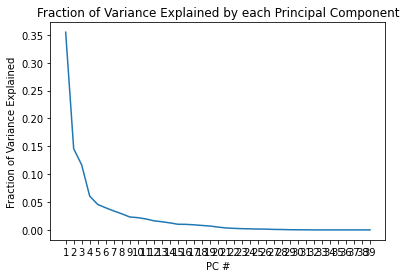

In [232]:
plt.plot([i for i in range(1,s.shape[0]+1)], s**2 / sum(s**2));
plt.xticks([i for i in range(1,s.shape[0]+1)],[i for i in range(1,s.shape[0]+1)]);
plt.xlabel('PC #');
plt.ylabel('Fraction of Variance Explained');
plt.title('Fraction of Variance Explained by each Principal Component');

In [233]:
death_pcs = pd.DataFrame(transformed_deaths_by_state @ vt.T, index=deaths_by_state.index)
death_pcs.columns = ["pc"+str(i+1) for i in death_pcs.columns.values]
death_pcs.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39
State,,,,,,,,,,,,,,,,,,,,,
Alabama,2.565843,1.345297,-1.423041,0.381582,-0.624875,0.887666,-0.356535,0.144034,-0.067347,-0.239891,...,-0.082746,-0.109673,3.452211e-15,-6.906181e-17,-3.261304e-16,1.716402e-16,-5.136645e-16,3.907124e-16,-2.008763e-16,-6.127671e-16
Arizona,6.622065,-2.001346,1.002453,0.485460,-1.863157,2.071381,5.786102,-0.889669,-0.558361,0.184934,...,0.141468,0.009857,1.945940e-15,9.200780e-17,-1.175463e-15,7.185324e-16,3.172211e-17,-2.331503e-15,1.778758e-15,-2.671406e-18
Arkansas,0.716616,1.003293,-1.080426,-0.267712,0.687202,0.539597,-0.199026,0.325923,-0.738502,0.564427,...,-0.078930,-0.100247,2.356344e-15,6.778405e-16,-1.599180e-16,2.098198e-15,1.740607e-17,5.407572e-16,-1.140240e-16,-1.450846e-16
California,11.048820,-6.021156,5.043118,-1.032426,1.985413,-1.223615,-2.406452,0.628566,0.073543,-0.348658,...,0.227766,0.020485,2.165383e-15,-9.059099e-17,-1.076920e-15,2.688109e-16,-1.600727e-15,-7.806658e-16,-1.224983e-15,-6.191964e-18
Colorado,0.723346,0.885057,1.005572,0.443362,-0.098306,-0.199943,-1.861243,-0.452425,1.366697,0.724762,...,-0.054466,0.017515,1.689929e-15,1.798804e-15,-5.842261e-16,3.161557e-15,-1.067811e-15,-2.438987e-17,3.486390e-17,-1.337859e-16


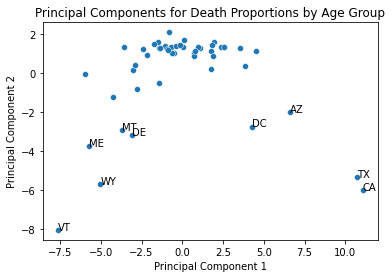

In [276]:
ax = sns.scatterplot(data = death_pcs, x = 'pc1', y = 'pc2', legend = True)
plt.title("Principal Components for Death Proportions by Age Group");
plt.xlabel("Principal Component 1");
plt.ylabel("Principal Component 2");
state_labels = {'California':"CA",'Texas':'TX', 'District of Columbia':'DC', 'Vermont':'VT',
               'Maine':'ME','Montana':'MT', 'Wyoming':"WY", 'Arizona':'AZ', 'Delaware':'DE'}
for k,v in state_labels.items():
    plt.text(x=death_pcs.loc[k,'pc1'], y=death_pcs.loc[k,'pc2'], s=v)
plt.savefig(fname="../figures/initial_death_pca.png")

In [274]:
death_pcs[(death_pcs['pc1']<0) & (death_pcs['pc2']<-2) & (death_pcs['pc2']>-4)]

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39
State,,,,,,,,,,,,,,,,,,,,,
Delaware,-3.100284,-3.170618,-2.005466,0.326752,0.737106,-1.479700,0.393360,-1.463444,0.738235,-2.067337,...,0.021504,-0.071593,2.422678e-15,1.469838e-15,-2.376829e-16,1.543755e-15,-1.074312e-16,-2.757214e-16,-2.739231e-16,-9.527075e-17
Maine,-5.749942,-3.749364,0.815393,2.343836,1.572729,1.982636,0.315887,3.061434,0.676296,-0.416264,...,-0.009120,0.028542,1.973036e-15,2.523693e-15,4.243997e-16,4.680579e-15,4.113198e-16,-1.628892e-15,-1.062690e-17,-1.456924e-17
Montana,-3.670881,-2.949280,-0.092952,-3.538112,-3.577946,1.170555,-0.956835,0.157658,-0.281908,0.307564,...,0.026281,-0.063087,2.072296e-15,-1.097462e-16,-2.995655e-16,-1.601786e-15,1.949209e-16,-1.811031e-16,-2.409837e-16,-9.210346e-17


In [272]:
death_pcs[(death_pcs['pc1']>5) & (death_pcs['pc2']<0)]

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39
State,,,,,,,,,,,,,,,,,,,,,
Arizona,6.622065,-2.001346,1.002453,0.485460,-1.863157,2.071381,5.786102,-0.889669,-0.558361,0.184934,...,0.141468,0.009857,1.945940e-15,9.200780e-17,-1.175463e-15,7.185324e-16,3.172211e-17,-2.331503e-15,1.778758e-15,-2.671406e-18
California,11.048820,-6.021156,5.043118,-1.032426,1.985413,-1.223615,-2.406452,0.628566,0.073543,-0.348658,...,0.227766,0.020485,2.165383e-15,-9.059099e-17,-1.076920e-15,2.688109e-16,-1.600727e-15,-7.806658e-16,-1.224983e-15,-6.191964e-18
Texas,10.707940,-5.338030,4.046211,-0.481803,0.545022,-0.598474,0.358714,-0.274687,-0.515872,0.303008,...,-0.304397,-0.025953,1.972700e-15,-2.663374e-16,-8.913560e-16,-4.523519e-16,-1.825397e-15,-2.425218e-15,-4.792798e-16,-8.524746e-18


In [242]:
death_pcs[(death_pcs['pc1']<0) & (death_pcs['pc2']<0)]

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39
State,,,,,,,,,,,,,,,,,,,,,
Delaware,-3.100284,-3.170618,-2.005466,0.326752,0.737106,-1.479700,0.393360,-1.463444,0.738235,-2.067337,...,0.021504,-0.071593,2.422678e-15,1.469838e-15,-2.376829e-16,1.543755e-15,-1.074312e-16,-2.757214e-16,-2.739231e-16,-9.527075e-17
Maine,-5.749942,-3.749364,0.815393,2.343836,1.572729,1.982636,0.315887,3.061434,0.676296,-0.416264,...,-0.009120,0.028542,1.973036e-15,2.523693e-15,4.243997e-16,4.680579e-15,4.113198e-16,-1.628892e-15,-1.062690e-17,-1.456924e-17
Montana,-3.670881,-2.949280,-0.092952,-3.538112,-3.577946,1.170555,-0.956835,0.157658,-0.281908,0.307564,...,0.026281,-0.063087,2.072296e-15,-1.097462e-16,-2.995655e-16,-1.601786e-15,1.949209e-16,-1.811031e-16,-2.409837e-16,-9.210346e-17
New Hampshire,-5.941307,-0.066192,2.521790,0.041363,2.430207,-1.450553,1.502900,-0.512716,0.635111,-0.338380,...,0.076411,-0.025928,1.875651e-15,-5.786027e-17,9.348367e-16,1.769283e-16,1.247116e-15,-5.330034e-16,2.024826e-17,4.268518e-17
North Carolina,-1.439949,-0.493558,-1.188564,-1.486105,0.421460,-0.710750,0.386602,-0.776585,-0.560551,0.583674,...,0.076192,-0.001227,2.422678e-15,-1.486131e-15,8.725401e-16,-6.211799e-16,3.134664e-17,1.111219e-16,3.054745e-16,1.094266e-16
North Dakota,-4.246946,-1.252475,0.832588,-4.178114,-1.031451,0.630504,0.073430,1.827146,0.343911,0.175506,...,0.022744,-0.052726,1.756544e-15,-1.430620e-15,4.284509e-16,-3.174693e-15,8.362583e-16,6.089875e-16,-6.173983e-16,-7.098463e-17
South Dakota,-2.747567,-0.838030,-0.424520,-3.761620,-1.415301,-1.907053,0.077585,-1.975259,-0.525128,0.408944,...,-0.039355,0.051243,9.620726e-16,1.971922e-15,5.886129e-16,1.506839e-15,8.332992e-16,8.371795e-16,-6.057250e-17,3.279663e-17
Vermont,-7.610240,-8.050158,-0.909196,5.580545,-1.168916,1.150429,-1.340468,-1.670511,-1.591840,1.557941,...,-0.001781,-0.012246,1.628206e-15,-1.025680e-15,8.106575e-16,-2.934053e-15,8.055436e-16,-1.221937e-15,-3.281693e-17,-2.271452e-17
Wyoming,-5.018126,-5.701138,-2.550730,-2.314353,-1.837433,-1.028015,0.112832,0.290520,1.328046,-1.480094,...,-0.028106,0.072076,1.978589e-15,4.567594e-16,2.064063e-16,1.821311e-15,3.134664e-17,-1.450129e-15,-7.978096e-16,5.738491e-17


In [236]:
death_pcs[death_pcs['pc2']<-2]

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39
State,,,,,,,,,,,,,,,,,,,,,
Arizona,6.622065,-2.001346,1.002453,0.485460,-1.863157,2.071381,5.786102,-0.889669,-0.558361,0.184934,...,0.141468,0.009857,1.945940e-15,9.200780e-17,-1.175463e-15,7.185324e-16,3.172211e-17,-2.331503e-15,1.778758e-15,-2.671406e-18
California,11.048820,-6.021156,5.043118,-1.032426,1.985413,-1.223615,-2.406452,0.628566,0.073543,-0.348658,...,0.227766,0.020485,2.165383e-15,-9.059099e-17,-1.076920e-15,2.688109e-16,-1.600727e-15,-7.806658e-16,-1.224983e-15,-6.191964e-18
Delaware,-3.100284,-3.170618,-2.005466,0.326752,0.737106,-1.479700,0.393360,-1.463444,0.738235,-2.067337,...,0.021504,-0.071593,2.422678e-15,1.469838e-15,-2.376829e-16,1.543755e-15,-1.074312e-16,-2.757214e-16,-2.739231e-16,-9.527075e-17
District of Columbia,4.248771,-2.749320,-9.739709,0.026015,3.208798,-2.042770,1.298693,1.326762,0.485012,0.203127,...,-0.038298,0.003225,2.154866e-15,-4.287965e-16,-1.603713e-16,-1.216950e-15,-9.982289e-16,7.472164e-16,2.249535e-17,-8.774315e-17
Maine,-5.749942,-3.749364,0.815393,2.343836,1.572729,1.982636,0.315887,3.061434,0.676296,-0.416264,...,-0.009120,0.028542,1.973036e-15,2.523693e-15,4.243997e-16,4.680579e-15,4.113198e-16,-1.628892e-15,-1.062690e-17,-1.456924e-17
Montana,-3.670881,-2.949280,-0.092952,-3.538112,-3.577946,1.170555,-0.956835,0.157658,-0.281908,0.307564,...,0.026281,-0.063087,2.072296e-15,-1.097462e-16,-2.995655e-16,-1.601786e-15,1.949209e-16,-1.811031e-16,-2.409837e-16,-9.210346e-17
Texas,10.707940,-5.338030,4.046211,-0.481803,0.545022,-0.598474,0.358714,-0.274687,-0.515872,0.303008,...,-0.304397,-0.025953,1.972700e-15,-2.663374e-16,-8.913560e-16,-4.523519e-16,-1.825397e-15,-2.425218e-15,-4.792798e-16,-8.524746e-18
Vermont,-7.610240,-8.050158,-0.909196,5.580545,-1.168916,1.150429,-1.340468,-1.670511,-1.591840,1.557941,...,-0.001781,-0.012246,1.628206e-15,-1.025680e-15,8.106575e-16,-2.934053e-15,8.055436e-16,-1.221937e-15,-3.281693e-17,-2.271452e-17
Wyoming,-5.018126,-5.701138,-2.550730,-2.314353,-1.837433,-1.028015,0.112832,0.290520,1.328046,-1.480094,...,-0.028106,0.072076,1.978589e-15,4.567594e-16,2.064063e-16,1.821311e-15,3.134664e-17,-1.450129e-15,-7.978096e-16,5.738491e-17


In [237]:
death_pcs[death_pcs['pc1']>5]

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39
State,,,,,,,,,,,,,,,,,,,,,
Arizona,6.622065,-2.001346,1.002453,0.485460,-1.863157,2.071381,5.786102,-0.889669,-0.558361,0.184934,...,0.141468,0.009857,1.945940e-15,9.200780e-17,-1.175463e-15,7.185324e-16,3.172211e-17,-2.331503e-15,1.778758e-15,-2.671406e-18
California,11.048820,-6.021156,5.043118,-1.032426,1.985413,-1.223615,-2.406452,0.628566,0.073543,-0.348658,...,0.227766,0.020485,2.165383e-15,-9.059099e-17,-1.076920e-15,2.688109e-16,-1.600727e-15,-7.806658e-16,-1.224983e-15,-6.191964e-18
Texas,10.707940,-5.338030,4.046211,-0.481803,0.545022,-0.598474,0.358714,-0.274687,-0.515872,0.303008,...,-0.304397,-0.025953,1.972700e-15,-2.663374e-16,-8.913560e-16,-4.523519e-16,-1.825397e-15,-2.425218e-15,-4.792798e-16,-8.524746e-18


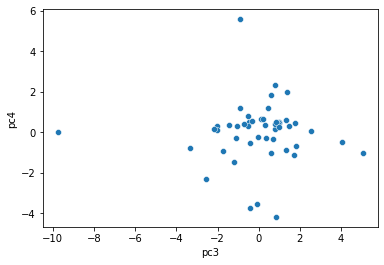

In [239]:
ax = sns.scatterplot(data = death_pcs, x = 'pc3', y = 'pc4', legend = True)


In [240]:
death_pcs[death_pcs['pc3']<-4]

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39
State,,,,,,,,,,,,,,,,,,,,,
District of Columbia,4.248771,-2.74932,-9.739709,0.026015,3.208798,-2.04277,1.298693,1.326762,0.485012,0.203127,...,-0.038298,0.003225,2.154866e-15,-4.287965e-16,-1.603713e-16,-1.216950e-15,-9.982289e-16,7.472164e-16,2.249535e-17,-8.774315e-17


In [241]:
death_pcs[death_pcs['pc4']>2.5]

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39
State,,,,,,,,,,,,,,,,,,,,,
Vermont,-7.61024,-8.050158,-0.909196,5.580545,-1.168916,1.150429,-1.340468,-1.670511,-1.59184,1.557941,...,-0.001781,-0.012246,1.628206e-15,-1.025680e-15,8.106575e-16,-2.934053e-15,8.055436e-16,-1.221937e-15,-3.281693e-17,-2.271452e-17


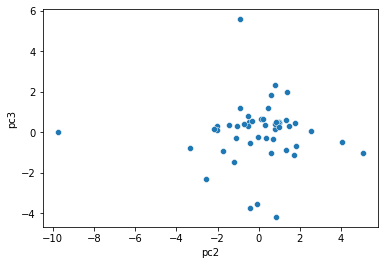

In [71]:
ax = sns.scatterplot(data = death_pcs, x = 'pc2', y = 'pc3', legend = True)


### Split By Time (pre/post-vaccine)

In [245]:
state_non_zero_deaths = non_zero_deaths.reset_index().set_index('State')
deaths_2020 = state_non_zero_deaths[state_non_zero_deaths['Year']==2020]
deaths_by_state_2020 = deaths_2020.reset_index().pivot(index='State', columns=['Year','Month'], values=['0-29','30-64','65+']).fillna(0)
deaths_by_state_2020.head()

0-29                                                              \
Year       2020                                                               
Month        3    4    5         6         7         8         9         10   
State                                                                         
Alabama     0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
Arizona     0.0  0.0  0.0  0.012263  0.010496  0.000000  0.000000  0.000000   
Arkansas    0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
California  0.0  0.0  0.0  0.006329  0.010592  0.006961  0.008721  0.006901   
Colorado    0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                                ...       65+                                \
Year                            ...      2020                                 
Month             11        12  ...        3         4         5         6    
State                           ...                                           
Alabama     0.000000  0.000000  ...  0.666667  0.784195  0.805288  0.729798   
Arizona     0.000000  0.000000  ...  0.645833  0.832911  0.773196  0.691193   
Arkansas    0.000000  0.000000  ...  0.000000  0.775510  0.859155  0.704403   
California  0.005108  0.004413  ...  0.741818  0.785857  0.779174  0.723466   
Colorado    0.000000  0.005970  ...  0.861386  0.873418  0.827511  0.780899   

                                                                        
Year                                                                    
Month             7         8         9         10        11        12  
State                                                                   
Alabama     0.771889  0.765199  0.816697  0.795956  0.804552  0.805701  
Arizona     0.707538  0.698073  0.704981  0.773438  0.768868  0.796247  
Arkansas    0.747212  0.793532  0.845783  0.850482  0.882002  0.842011  
California  0.698786  0.720482  0.714632  0.728088  0.752063  0.756213  
Colorado    0.899281  0.846154  0.857143  0.826446  0.855848  0.863881  

[5 rows x 30 columns]

In [298]:
scaler = StandardScaler()
deaths_by_state_2020.columns = [str(col) for col in deaths_by_state_2020.columns.values]
transformed_deaths_by_state = scaler.fit_transform(deaths_by_state_2020)
u, s, vt = svd(transformed_deaths_by_state, full_matrices=False)

death_pcs_2020 = pd.DataFrame(transformed_deaths_by_state @ vt.T, index=deaths_by_state_2020.index)
death_pcs_2020.columns = ["pc"+str(i+1) for i in death_pcs_2020.columns.values]
death_pcs_2020.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30
State,,,,,,,,,,,,,,,,,,,,,
Alabama,-1.875514,1.023011,-1.191350,0.559109,-0.696475,0.845013,-0.343034,0.026762,0.119122,-0.057443,...,-0.002105,-0.161403,-0.087242,0.034835,0.142658,0.000769,-1.741478e-15,6.363217e-17,2.009159e-17,3.278600e-16
Arizona,-4.483388,-0.536325,-0.272276,0.718918,-1.300994,2.110515,-2.527333,2.467782,0.153274,-1.657428,...,0.323483,0.101548,-0.071784,0.007473,0.042861,-0.117549,-2.048517e-15,-4.869049e-16,6.672065e-16,1.274193e-17
Arkansas,-0.258031,0.646731,-0.989081,-0.600173,0.646047,0.293810,-0.045853,-0.411599,-1.078197,-0.427638,...,-0.132227,-0.038606,-0.688105,-0.327158,0.015572,-0.014270,-1.035630e-15,-2.166205e-16,-4.364514e-16,5.435778e-17
California,-10.137701,-4.985968,5.552904,-0.849921,1.349006,-1.276403,0.701387,-0.764564,-0.071736,0.855672,...,-0.096726,0.272850,-0.000815,0.110228,0.074124,-0.135581,-7.547683e-16,-8.924519e-16,1.368601e-15,-8.598625e-19
Colorado,-0.699517,0.739634,1.098983,0.742069,-0.043767,0.018770,1.671406,-1.884215,1.079162,0.383238,...,0.158207,0.170639,-0.042230,0.083967,0.100699,0.005281,3.033730e-16,9.971849e-16,-1.188949e-15,5.567982e-17


In [299]:
s[0]**2 / sum(s**2),s[1]**2 / sum(s**2)

(0.3115043734669113, 0.15708648016843388)

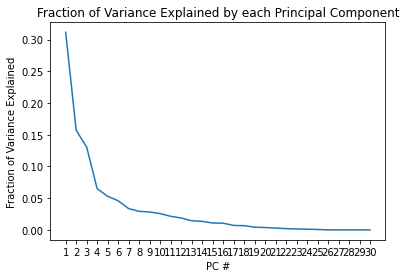

In [278]:
plt.plot([i for i in range(1,s.shape[0]+1)], s**2 / sum(s**2));
plt.xticks([i for i in range(1,s.shape[0]+1)],[i for i in range(1,s.shape[0]+1)]);
plt.xlabel('PC #');
plt.ylabel('Fraction of Variance Explained');
plt.title('Fraction of Variance Explained by each Principal Component');

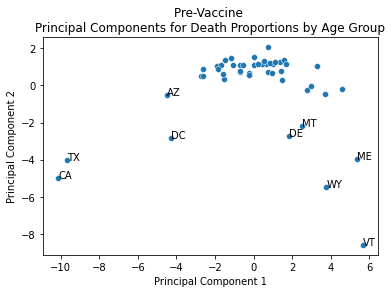

In [282]:
ax = sns.scatterplot(data = death_pcs_2020, x = 'pc1', y = 'pc2', legend = True)
state_labels = {'California':"CA",'Texas':'TX', 'District of Columbia':'DC', 'Vermont':'VT',
               'Maine':'ME','Montana':'MT', 'Wyoming':"WY", 'Arizona':'AZ', 'Delaware':'DE'}
for k,v in state_labels.items():
    plt.text(x=death_pcs_2020.loc[k,'pc1'], y=death_pcs_2020.loc[k,'pc2'], s=v)
plt.title("Pre-Vaccine \nPrincipal Components for Death Proportions by Age Group");
plt.xlabel("Principal Component 1");
plt.ylabel("Principal Component 2");
plt.savefig(fname='../figures/pre_vaccine_death_pca.png')

In [249]:
death_pcs_2020[death_pcs_2020['pc2']<-2]

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30
State,,,,,,,,,,,,,,,,,,,,,
California,-10.137701,-4.985968,5.552904,-0.849921,1.349006,-1.276403,0.701387,-0.764564,-0.071736,0.855672,...,-0.096726,0.272850,-0.000815,0.110228,0.074124,-0.135581,-7.547683e-16,-8.924519e-16,1.368601e-15,-8.598625e-19
Delaware,1.837507,-2.727242,-1.717573,0.733895,1.333912,-1.021873,0.982216,2.095629,1.299626,0.581882,...,0.197889,0.138630,0.150788,0.282420,0.070664,0.022290,-1.318645e-15,7.053825e-16,4.072341e-16,4.068378e-17
District of Columbia,-4.275446,-2.835924,-9.123332,-1.180951,2.831460,-1.939745,-1.383710,-0.920617,0.255599,0.266106,...,0.073723,-0.017953,0.084801,0.167616,-0.001237,0.011943,-3.376767e-16,-1.200301e-15,3.658316e-17,-1.436269e-17
Maine,5.368654,-3.982719,1.340779,1.889339,2.107193,0.787792,-2.332137,-1.352740,0.131365,-0.237557,...,0.109349,0.219075,-0.049375,0.036374,-0.074780,0.000102,-6.051237e-16,-7.471694e-16,-1.131614e-16,2.429617e-17
Montana,2.527295,-2.195069,0.640511,-3.033138,-4.138687,0.956240,-0.115962,-0.763753,-0.302835,0.586294,...,0.063275,0.144828,-0.138034,0.304577,-0.005939,0.022188,-6.627691e-16,5.582231e-16,-2.605992e-16,3.107305e-17
Texas,-9.698056,-4.027583,3.944602,-0.364345,0.230524,-0.378899,-0.263661,0.571688,-0.322265,-0.819070,...,-0.076209,-0.319715,0.008398,-0.129808,-0.088207,0.181631,-1.171952e-15,-7.398982e-17,3.528472e-16,9.277085e-18
Vermont,5.655662,-8.597770,-1.086452,4.538070,-1.209822,1.474567,1.773452,-0.168105,-1.640113,-0.534855,...,-0.100405,-0.082973,0.027504,-0.086574,0.034051,-0.000163,-1.274586e-15,8.051374e-16,-7.786856e-16,3.325183e-17
Wyoming,3.772873,-5.497514,-1.982559,-2.846694,-2.252054,-1.711127,-0.137082,1.171034,1.988078,0.761407,...,0.004710,-0.009912,-0.080268,-0.216914,-0.048302,-0.022005,-1.033607e-15,-8.709646e-16,3.247597e-16,-5.481439e-17


In [155]:
death_pcs_2020[death_pcs_2020['pc1']<-3]

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30
State,,,,,,,,,,,,,,,,,,,,,
Arizona,-4.483388,-0.536325,-0.272276,0.718918,-1.300994,2.110515,-2.527333,2.467782,0.153274,-1.657428,...,0.323483,0.101548,-0.071784,0.007473,0.042861,-0.117549,-2.048517e-15,-4.869049e-16,6.672065e-16,1.274193e-17
California,-10.137701,-4.985968,5.552904,-0.849921,1.349006,-1.276403,0.701387,-0.764564,-0.071736,0.855672,...,-0.096726,0.272850,-0.000815,0.110228,0.074124,-0.135581,-7.547683e-16,-8.924519e-16,1.368601e-15,-8.598625e-19
District of Columbia,-4.275446,-2.835924,-9.123332,-1.180951,2.831460,-1.939745,-1.383710,-0.920617,0.255599,0.266106,...,0.073723,-0.017953,0.084801,0.167616,-0.001237,0.011943,-3.376767e-16,-1.200301e-15,3.658316e-17,-1.436269e-17
Texas,-9.698056,-4.027583,3.944602,-0.364345,0.230524,-0.378899,-0.263661,0.571688,-0.322265,-0.819070,...,-0.076209,-0.319715,0.008398,-0.129808,-0.088207,0.181631,-1.171952e-15,-7.398982e-17,3.528472e-16,9.277085e-18


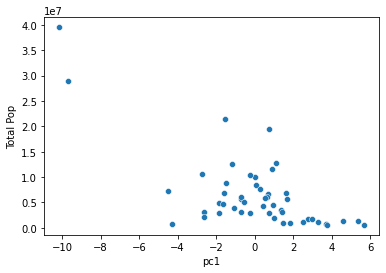

In [156]:
# import data state population data from https://www.kaggle.com/peretzcohen/2019-census-us-population-data-by-state
population_data = pd.read_csv('../data/2019_Census_US_Population_Data_By_State_Lat_Long.csv')
population_data = population_data.rename(columns = {'STATE':'State', 'POPESTIMATE2019': 'Total Pop'})
population_data = population_data.drop(columns = ['lat','long'])
population_data=population_data.set_index('State');
population_data;
population_and_pcs = death_pcs_2020.merge(population_data, left_index=True, right_index=True)
population_and_pcs.head()
ax = sns.scatterplot(data = population_and_pcs, x = 'pc1', y = 'Total Pop', legend = True)


In [250]:
state_non_zero_deaths = non_zero_deaths.reset_index().set_index('State')
deaths_2021 = state_non_zero_deaths[state_non_zero_deaths['Year']==2021]
deaths_by_state_2021 = deaths_2021.reset_index().pivot(index='State', columns=['Year','Month'], values=['0-29','30-64','65+']).fillna(0)
deaths_by_state_2021.head()

0-29                    30-64                           65+  \
Year            2021                     2021                          2021   
Month              1         2    3         1         2         3         1   
State                                                                         
Alabama     0.000000  0.000000  0.0  0.211001  0.223582  0.167665  0.788999   
Arizona     0.005296  0.006962  0.0  0.230769  0.231646  0.221212  0.763934   
Arkansas    0.000000  0.000000  0.0  0.173647  0.187783  0.203252  0.826353   
California  0.004360  0.003896  0.0  0.256943  0.285136  0.302498  0.738697   
Colorado    0.000000  0.000000  0.0  0.159892  0.154574  0.183908  0.840108   

                                
Year                            
Month              2         3  
State                           
Alabama     0.776418  0.832335  
Arizona     0.761392  0.778788  
Arkansas    0.812217  0.796748  
California  0.710968  0.697502  
Colorado    0.845426  0.816092

In [300]:
scaler = StandardScaler()
deaths_by_state_2021.columns = [str(col) for col in deaths_by_state_2021.columns.values]
transformed_deaths_by_state = scaler.fit_transform(deaths_by_state_2021)
u, s, vt = svd(transformed_deaths_by_state, full_matrices=False)

death_pcs_2021 = pd.DataFrame(deaths_by_state_2021 @ vt.T, index=deaths_by_state_2021.index)
death_pcs_2021.columns = ["pc"+str(i+1) for i in death_pcs_2021.columns.values]
death_pcs_2021.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
State,,,,,,,,,
Alabama,-0.275645,0.318313,-0.786757,-0.066017,-0.305726,-0.377464,-0.543362,0.841966,0.001793
Arizona,-0.233338,0.294976,-0.742857,-0.014335,-0.299624,-0.388079,-0.539382,0.837218,0.001787
Arkansas,-0.329353,0.289515,-0.796401,-0.005940,-0.305713,-0.399155,-0.543441,0.842253,0.001794
California,-0.152336,0.289170,-0.677291,0.072641,-0.263043,-0.375840,-0.541175,0.838077,0.001783
Colorado,-0.372950,0.282007,-0.817198,-0.023544,-0.325817,-0.414280,-0.543546,0.842375,0.001794


In [301]:
s[0]**2 / sum(s**2),s[1]**2 / sum(s**2)

(0.5886713765246075, 0.17314602911167157)

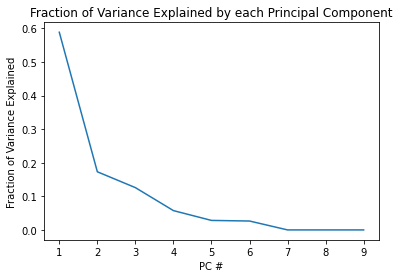

In [284]:
plt.plot([i for i in range(1,s.shape[0]+1)], s**2 / sum(s**2));
plt.xticks([i for i in range(1,s.shape[0]+1)],[i for i in range(1,s.shape[0]+1)]);
plt.xlabel('PC #');
plt.ylabel('Fraction of Variance Explained');
plt.title('Fraction of Variance Explained by each Principal Component');

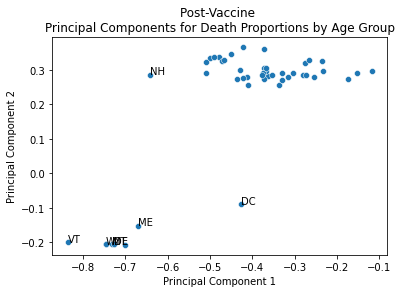

In [290]:
ax = sns.scatterplot(data = death_pcs_2021, x = 'pc1', y = 'pc2', legend = True)
plt.title("Post-Vaccine \nPrincipal Components for Death Proportions by Age Group");
plt.xlabel("Principal Component 1");
plt.ylabel("Principal Component 2");
state_labels = {'District of Columbia':'DC', 'Vermont':'VT', 'New Hampshire':'NH',
               'Maine':'ME','Montana':'MT', 'Wyoming':"WY", 'Delaware':'DE'}

for k,v in state_labels.items():
    plt.text(x=death_pcs_2021.loc[k,'pc1'], y=death_pcs_2021.loc[k,'pc2'], s=v)
plt.savefig(fname='../figures/post_vaccine_death_pca.png')

In [289]:
death_pcs_2021[death_pcs_2021['pc2']<=0].index.values

array(['Delaware', 'District of Columbia', 'Maine', 'Montana',
       'North Carolina', 'North Dakota', 'South Dakota', 'Vermont',
       'Wyoming'], dtype=object)

All these states are fairly rural but _not_ Southern except North Carolina. 

In [162]:
# import data state population data from https://www.kaggle.com/peretzcohen/2019-census-us-population-data-by-state
population_data = pd.read_csv('../data/2019_Census_US_Population_Data_By_State_Lat_Long.csv')
population_data = population_data.rename(columns = {'STATE':'State', 'POPESTIMATE2019': 'Total Pop'})
population_data = population_data.drop(columns = ['lat','long'])
population_data=population_data.set_index('State');
population_data;

In [163]:
population_and_pcs = death_pcs_2021.merge(population_data, left_index=True, right_index=True)
population_and_pcs.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,Total Pop
State,,,,,,,,,,
Alabama,-0.275645,0.318313,-0.786757,-0.066017,-0.305726,-0.377464,-0.543362,0.841966,0.001793,4903185
Arizona,-0.233338,0.294976,-0.742857,-0.014335,-0.299624,-0.388079,-0.539382,0.837218,0.001787,7278717
Arkansas,-0.329353,0.289515,-0.796401,-0.005940,-0.305713,-0.399155,-0.543441,0.842253,0.001794,3017804
California,-0.152336,0.289170,-0.677291,0.072641,-0.263043,-0.375840,-0.541175,0.838077,0.001783,39512223
Colorado,-0.372950,0.282007,-0.817198,-0.023544,-0.325817,-0.414280,-0.543546,0.842375,0.001794,5758736


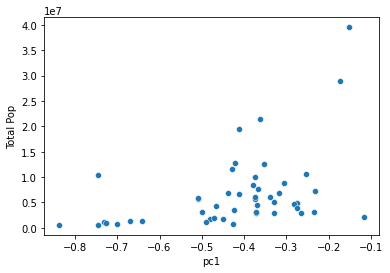

In [164]:
ax = sns.scatterplot(data = population_and_pcs, x = 'pc1', y = 'Total Pop', legend = True)


## PCA on Death Counts

In [112]:
covid_data = pd.read_csv('../data/all_covid_data.csv', index_col="Unnamed: 0")


In [171]:
covid_data

,Date,State,Total Pop,Day_of_Wk,Confirmed,Confirmed_diff,Confirmed_rate,Confirmed_rate_diff,Deaths,Deaths_diff,...,Active_rate_diff,Active_rate,Case_Fatality_Ratio,Administered,Series_Complete_Yes,Month,Year,Monthly Temp (F),Monthly Avg Temp (F),MM-YYYY
0,2020-04-12,Alabama,4903185,Sunday,3667,NaN,0.000748,NaN,93,NaN,...,NaN,0.000708,2.610160,0.0,0.0,4,2020,61.55,63.096875,4-2020
1,2020-04-13,Alabama,4903185,Monday,3870,203.0,0.000789,0.000041,99,6.0,...,0.000034,0.000741,2.651312,0.0,0.0,4,2020,61.55,63.096875,4-2020
2,2020-04-14,Alabama,4903185,Tuesday,4041,171.0,0.000824,0.000035,114,15.0,...,0.000042,0.000783,2.883886,0.0,0.0,4,2020,61.55,63.096875,4-2020
3,2020-04-15,Alabama,4903185,Wednesday,4307,266.0,0.000878,0.000054,118,4.0,...,0.000024,0.000807,2.895706,0.0,0.0,4,2020,61.55,63.096875,4-2020
4,2020-04-16,Alabama,4903185,Thursday,4465,158.0,0.000911,0.000032,133,15.0,...,0.000052,0.000859,3.060990,0.0,0.0,4,2020,61.55,63.096875,4-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17341,2021-03-27,Wyoming,578759,Saturday,56046,0.0,0.096838,0.000000,695,0.0,...,NaN,NaN,1.240053,243604.0,96104.0,3,2021,32.03,32.585500,3-2021
17342,2021-03-28,Wyoming,578759,Sunday,56046,0.0,0.096838,0.000000,695,0.0,...,NaN,NaN,1.240053,244038.0,96398.0,3,2021,32.03,32.585500,3-2021
17343,2021-03-29,Wyoming,578759,Monday,56190,144.0,0.097087,0.000249,695,0.0,...,NaN,NaN,1.236875,261950.0,104783.0,3,2021,32.03,32.585500,3-2021
17344,2021-03-30,Wyoming,578759,Tuesday,56236,46.0,0.097167,0.000079,695,0.0,...,NaN,NaN,1.235863,261963.0,104805.0,3,2021,32.03,32.585500,3-2021


In [115]:
covid_data[['Year','Month','State','Deaths','Deaths_rate_diff']]

,Year,Month,State,Deaths,Deaths_rate_diff
0,2020,4,Alabama,93,NaN
1,2020,4,Alabama,99,1.223694e-06
2,2020,4,Alabama,114,3.059236e-06
3,2020,4,Alabama,118,8.157963e-07
4,2020,4,Alabama,133,3.059236e-06
...,...,...,...,...,...
17341,2021,3,Wyoming,695,0.000000e+00
17342,2021,3,Wyoming,695,0.000000e+00
17343,2021,3,Wyoming,695,0.000000e+00
17344,2021,3,Wyoming,695,0.000000e+00


In [118]:
covid_data['MM-YYYY'] = covid_data['Month'].astype(str) + '-' + covid_data['Year'].astype(str)

In [125]:
death_rate_by_month_state = covid_data[['MM-YYYY','State','Deaths_rate_diff']].groupby(['State','MM-YYYY']).mean().reset_index('MM-YYYY').pivot(columns='MM-YYYY',values='Deaths_rate_diff')
death_rate_by_month_state.head()

MM-YYYY,1-2021,10-2020,11-2020,12-2020,2-2021,3-2021,4-2020,5-2020,6-2020,7-2020,8-2020,9-2020
State,,,,,,,,,,,,
Alabama,0.000019,0.000003,0.000004,0.000008,0.000016,4.111876e-06,2.028160e-06,2.355283e-06,0.000002,4.144771e-06,3.960559e-06,2.433792e-06
Arizona,0.000019,0.000001,0.000003,0.000010,0.000014,4.374220e-06,1.564684e-06,2.601486e-06,0.000003,9.080828e-06,5.916498e-06,2.843908e-06
Arkansas,0.000013,0.000006,0.000006,0.000013,0.000004,4.093983e-06,6.259150e-07,7.696261e-07,0.000002,1.956133e-06,3.677102e-06,6.318060e-06
California,0.000012,0.000001,0.000001,0.000006,0.000010,5.809554e-06,1.955794e-06,1.747928e-06,0.000002,2.556987e-06,3.108879e-06,2.415286e-06
Colorado,0.000005,0.000001,0.000004,0.000010,0.000002,8.738477e-07,4.707823e-06,3.741861e-06,0.000001,8.290350e-07,5.993699e-07,6.135606e-07


In [167]:
scaler = StandardScaler()
transformed_death_rate_by_month_state = scaler.fit_transform(death_rate_by_month_state)
u, s, vt = svd(transformed_death_rate_by_month_state, full_matrices=False)

death_rate_pcs = pd.DataFrame(transformed_death_rate_by_month_state @ vt.T, index=death_rate_by_month_state.index)
death_rate_pcs.columns = ["pc"+str(i+1) for i in death_rate_pcs.columns.values]
death_rate_pcs.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
State,,,,,,,,,,,,
Alabama,-3.453029,1.233430,0.297871,2.203641,-0.910106,-1.230122,0.519659,0.137751,0.094245,0.166799,0.416310,0.166050
Arizona,-4.814055,2.105739,0.483344,0.854828,-2.161782,0.242633,0.872737,-0.703942,0.020370,0.702964,-0.571142,-0.264484
Arkansas,-2.512114,-1.813467,-0.591380,-0.602410,1.145394,0.338752,-0.963373,1.383344,-0.598506,0.503136,-0.168682,-0.319970
California,-1.396336,1.172275,1.614142,1.194600,0.518513,-0.008369,0.099047,0.181723,-0.052101,0.085241,0.135458,0.061758
Colorado,2.477434,-0.719968,0.244725,-0.303474,-0.782820,0.381173,-0.147690,-0.049066,0.025726,-0.170205,-0.268929,-0.033811


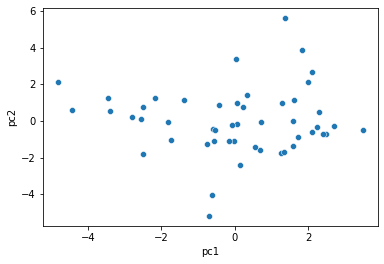

In [170]:
ax = sns.scatterplot(data = death_rate_pcs, x = 'pc1', y = 'pc2', legend = True)


In [172]:
covid_data

,Date,State,Total Pop,Day_of_Wk,Confirmed,Confirmed_diff,Confirmed_rate,Confirmed_rate_diff,Deaths,Deaths_diff,...,Active_rate_diff,Active_rate,Case_Fatality_Ratio,Administered,Series_Complete_Yes,Month,Year,Monthly Temp (F),Monthly Avg Temp (F),MM-YYYY
0,2020-04-12,Alabama,4903185,Sunday,3667,NaN,0.000748,NaN,93,NaN,...,NaN,0.000708,2.610160,0.0,0.0,4,2020,61.55,63.096875,4-2020
1,2020-04-13,Alabama,4903185,Monday,3870,203.0,0.000789,0.000041,99,6.0,...,0.000034,0.000741,2.651312,0.0,0.0,4,2020,61.55,63.096875,4-2020
2,2020-04-14,Alabama,4903185,Tuesday,4041,171.0,0.000824,0.000035,114,15.0,...,0.000042,0.000783,2.883886,0.0,0.0,4,2020,61.55,63.096875,4-2020
3,2020-04-15,Alabama,4903185,Wednesday,4307,266.0,0.000878,0.000054,118,4.0,...,0.000024,0.000807,2.895706,0.0,0.0,4,2020,61.55,63.096875,4-2020
4,2020-04-16,Alabama,4903185,Thursday,4465,158.0,0.000911,0.000032,133,15.0,...,0.000052,0.000859,3.060990,0.0,0.0,4,2020,61.55,63.096875,4-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17341,2021-03-27,Wyoming,578759,Saturday,56046,0.0,0.096838,0.000000,695,0.0,...,NaN,NaN,1.240053,243604.0,96104.0,3,2021,32.03,32.585500,3-2021
17342,2021-03-28,Wyoming,578759,Sunday,56046,0.0,0.096838,0.000000,695,0.0,...,NaN,NaN,1.240053,244038.0,96398.0,3,2021,32.03,32.585500,3-2021
17343,2021-03-29,Wyoming,578759,Monday,56190,144.0,0.097087,0.000249,695,0.0,...,NaN,NaN,1.236875,261950.0,104783.0,3,2021,32.03,32.585500,3-2021
17344,2021-03-30,Wyoming,578759,Tuesday,56236,46.0,0.097167,0.000079,695,0.0,...,NaN,NaN,1.235863,261963.0,104805.0,3,2021,32.03,32.585500,3-2021


In [174]:
death_rate_by_month_state.columns.values

array(['1-2021', '10-2020', '11-2020', '12-2020', '2-2021', '3-2021',
       '4-2020', '5-2020', '6-2020', '7-2020', '8-2020', '9-2020'],
      dtype=object)

In [176]:
months_2020 = ['12-2020', '4-2020', '5-2020', '6-2020', '7-2020', '8-2020', '9-2020','10-2020', '11-2020']
months_2021 = ['1-2021', '2-2021', '3-2021']

In [178]:
death_rates_2020 = death_rate_by_month_state.loc[:,months_2020]
death_rates_2021 = death_rate_by_month_state.loc[:,months_2021]

In [180]:
scaler = StandardScaler()
scaled_death_rates_2020 = scaler.fit_transform(death_rates_2020)
u, s, vt = svd(scaled_death_rates_2020, full_matrices=False)

death_rate_2020_pcs = pd.DataFrame(scaled_death_rates_2020 @ vt.T, index=death_rates_2020.index)
death_rate_2020_pcs.columns = ["pc"+str(i+1) for i in death_rate_2020_pcs.columns.values]
death_rate_2020_pcs.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
State,,,,,,,,,
Alabama,0.716773,1.195526,-0.397715,-0.442549,0.311622,-0.282154,0.052328,-0.187531,0.112959
Arizona,1.053573,3.650213,-0.144015,-2.074165,0.574515,-0.854885,0.034230,-0.905289,-0.287196
Arkansas,2.953986,0.590738,0.839343,1.182180,-0.397073,1.351901,-0.495133,-0.404927,-0.281353
California,-0.071489,0.816340,-1.507988,0.029718,0.044555,0.238649,-0.089006,-0.043662,0.002647
Colorado,-0.873666,-1.246259,-0.550324,-0.580636,-0.163517,0.049925,0.024421,-0.047455,0.013882


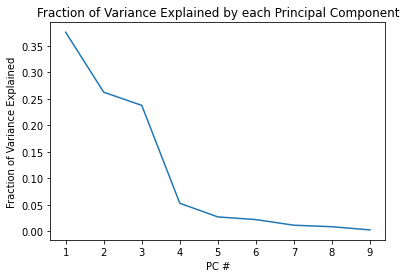

In [181]:
plt.plot([i for i in range(1,s.shape[0]+1)], s**2 / sum(s**2));
plt.xticks([i for i in range(1,s.shape[0]+1)],[i for i in range(1,s.shape[0]+1)]);
plt.xlabel('PC #');
plt.ylabel('Fraction of Variance Explained');
plt.title('Fraction of Variance Explained by each Principal Component');

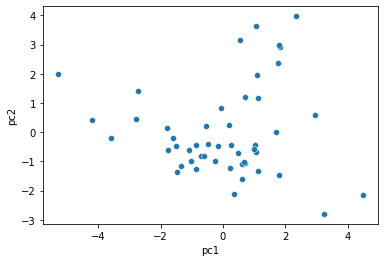

In [185]:
ax = sns.scatterplot(data = death_rate_2020_pcs, x = 'pc1', y = 'pc2', legend = True)


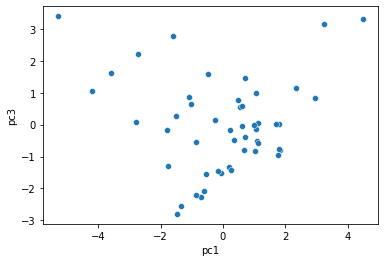

In [186]:
ax = sns.scatterplot(data = death_rate_2020_pcs, x = 'pc1', y = 'pc3', legend = True)


In [187]:
scaler = StandardScaler()
scaled_death_rates_2021 = scaler.fit_transform(death_rates_2021)
u, s, vt = svd(scaled_death_rates_2021, full_matrices=False)

death_rate_2021_pcs = pd.DataFrame(scaled_death_rates_2021 @ vt.T, index=death_rates_2021.index)
death_rate_2021_pcs.columns = ["pc"+str(i+1) for i in death_rate_2021_pcs.columns.values]
death_rate_2021_pcs.head()

,pc1,pc2,pc3
State,,,
Alabama,-3.994948,1.555649,-0.594570
Arizona,-3.609331,1.305851,-0.011599
Arkansas,-0.570656,-0.000379,1.160310
California,-2.096261,-0.529884,-0.100585
Colorado,2.161181,0.178281,-0.047204


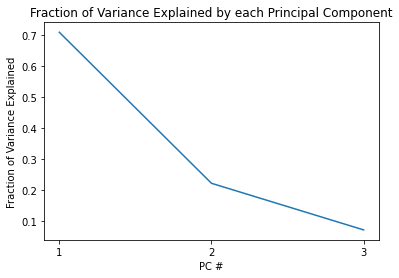

In [189]:
plt.plot([i for i in range(1,s.shape[0]+1)], s**2 / sum(s**2));
plt.xticks([i for i in range(1,s.shape[0]+1)],[i for i in range(1,s.shape[0]+1)]);
plt.xlabel('PC #');
plt.ylabel('Fraction of Variance Explained');
plt.title('Fraction of Variance Explained by each Principal Component');

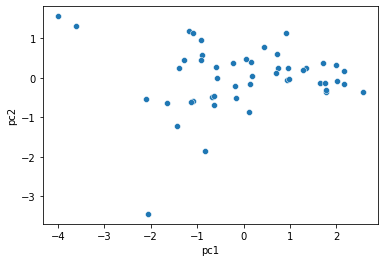

In [190]:
ax = sns.scatterplot(data = death_rate_2021_pcs, x = 'pc1', y = 'pc2', legend = True)

Are either of these principal compenents correlated with vaccination rates? 


In [193]:
covid_data.columns

Index(['Date', 'State', 'Total Pop', 'Day_of_Wk', 'Confirmed',
       'Confirmed_diff', 'Confirmed_rate', 'Confirmed_rate_diff', 'Deaths',
       'Deaths_diff', 'Deaths_rate', 'Deaths_rate_diff', 'Recovered',
       'Recovered_rate', 'Recovered_diff', 'Recovered_rate_diff', 'Active',
       'Active_diff', 'Active_rate_diff', 'Active_rate', 'Case_Fatality_Ratio',
       'Administered', 'Series_Complete_Yes', 'Month', 'Year',
       'Monthly Temp (F)', 'Monthly Avg Temp (F)', 'MM-YYYY'],
      dtype='object')

In [214]:
vaccine_rate_by_month_state = covid_data[['MM-YYYY',
    'State',
    'Administered']].groupby(['State',
    'MM-YYYY']).mean().reset_index('MM-YYYY').pivot(columns='MM-YYYY',
                                                   values='Administered')
vaccine_rate_by_month_state.head()


MM-YYYY,1-2021,10-2020,11-2020,12-2020,2-2021,3-2021,4-2020,5-2020,6-2020,7-2020,8-2020,9-2020
State,,,,,,,,,,,,
Alabama,1.430250e+05,0.0,0.0,6019.258065,6.299154e+05,1.341192e+06,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,2.502199e+05,0.0,0.0,8542.032258,1.138007e+06,2.632760e+06,0.0,0.0,0.0,0.0,0.0,0.0
Arkansas,1.349082e+05,0.0,0.0,8643.000000,4.649183e+05,9.104709e+05,0.0,0.0,0.0,0.0,0.0,0.0
California,1.405933e+06,0.0,0.0,77262.322581,5.959834e+06,1.322316e+07,0.0,0.0,0.0,0.0,0.0,0.0
Colorado,2.955528e+05,0.0,0.0,21225.258065,9.608366e+05,2.001146e+06,0.0,0.0,0.0,0.0,0.0,0.0


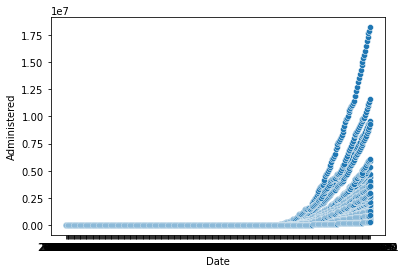

In [217]:
# administered is cumulative... 
sns.scatterplot(data=covid_data, x='Date', y='Administered');


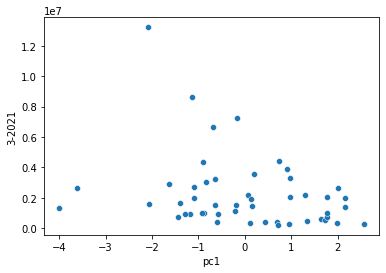

In [224]:
vaccine_and_death_rate_pcs_2021 = vaccine_rate_by_month_state.loc[:,months_2021].merge(death_rate_2021_pcs, 
                                                                                      left_index=True, right_index=True)
vaccine_and_death_rate_pcs_2021
sns.scatterplot(data=vaccine_and_death_rate_pcs_2021, x='pc1',y='3-2021');


The vaccine administration doesn't seem to have a correlation with the principal components. 